# Rainfall Data for DeepSouth

In [1]:
%load_ext autoreload

%autoreload 2


import datetime
import pandas as pd
import xarray as xr
import datetime
import verif
import verif.obs
from verif.obs import ddb, ice, obsAPI, utils
import matplotlib.pyplot as plt


In [2]:

import mlpp

from mlpp import data

In [3]:
stations = { 'Kaitaia Aero' : ('NZKTA', '93014'),
            'Whangarei Aero' : ('NZWRA', '93057'),
            'Auckland Aero' : ('NZAAA', '93110'),
            'Hamilton Aero' : ('NZHNA', '93173'),
            'Gisborne Aero' : ('NZGSA', '93292'),
            'New Plymouth Aero' : ('NZNPA', '93309'),
            'Napier Aero' : ('NZNRA', '93373'),
            'Ohakea Aero' : ('NZOHA', '93402'),
            'Nelson Aero' : ('NZNSA', '93546'),
            'Wellington Aero' : ('NZWNA', '93439'),
            'Hokitika Aero' : ('NZHKA', '93615'),
            'Christchurch Aero' : ('NZCHA', '93781'),
            'Chatham Island Aero' : ('NZCIA', '93985'),
            'Queenstown Aero' : ('NZQNA', '93831'),
            'Dunedin Aero' : ('NZDNA', '93891'),
            'Invercargill Aero' : ('NZNVA', '93845'),
}


In [4]:
stations.keys()

dict_keys(['Kaitaia Aero', 'Whangarei Aero', 'Auckland Aero', 'Hamilton Aero', 'Gisborne Aero', 'New Plymouth Aero', 'Napier Aero', 'Ohakea Aero', 'Nelson Aero', 'Wellington Aero', 'Hokitika Aero', 'Christchurch Aero', 'Chatham Island Aero', 'Queenstown Aero', 'Dunedin Aero', 'Invercargill Aero'])

# DT archive

In [5]:
station_obs = []

for station in stations.keys():
    print(stations[station][0])

    obs_all = data.get_obs_dataset(station=stations[station][1],
                    time_period = [202101, 209912],
                    obs_repo_path = 's3://metservice-research-ap-southeast-2/prod/archive-data/ec2dt/deepthought-data-epd/observation/target',)
    
    obs_all.attrs = {'source': 'MetService',
                     'station' : station,
                    'station_id': stations[station][1],
                    'station_code' : stations[station][0]}

    station_obs.append(obs_all[['rrr01', 'rr10m']])

2024-04-12 09:06:12,840 - INFO - Found credentials in shared credentials file: ~/.aws/credentials


NZKTA
NZWRA
NZAAA
NZHNA
NZGSA
NZNPA
NZNRA
NZOHA
NZNSA
NZWNA
NZHKA
NZCHA
NZCIA
NZQNA
NZDNA
NZNVA


In [6]:
station_obs[0].station_code 

'NZKTA'

In [7]:
for obs in station_obs:
    obs.to_netcdf(f'/home/benv/data/DeepSouth/Rainfall_{obs.station_code}.nc', engine='netcdf4')

In [8]:
xr.open_dataset('/home/benv/data/DeepSouth/Rainfall_NZAAA.nc', engine='netcdf4')

<xarray.Dataset>
Dimensions:         (valid_time_utc: 166585)
Coordinates:
  * valid_time_utc  (valid_time_utc) datetime64[ns] 2021-01-01 ... 2024-03-13...
Data variables:
    rrr01           (valid_time_utc) float32 ...
    rr10m           (valid_time_utc) float32 ...
Attributes:
    source:        MetService
    station:       Auckland Aero
    station_id:    93110
    station_code:  NZAAA

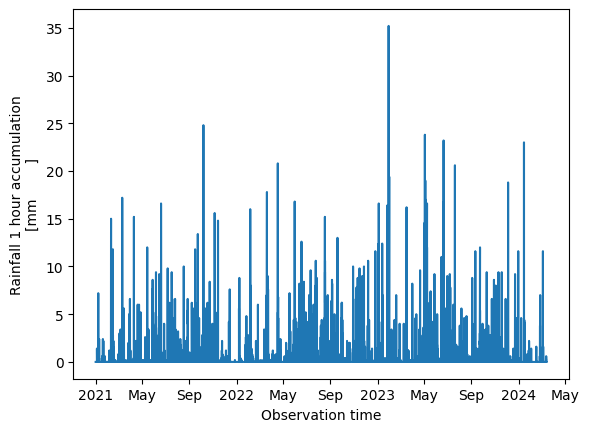

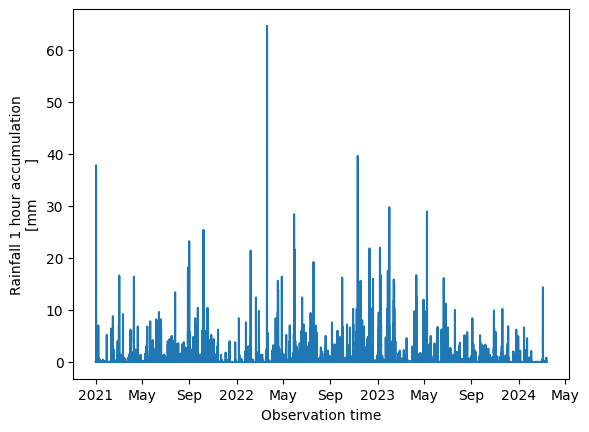

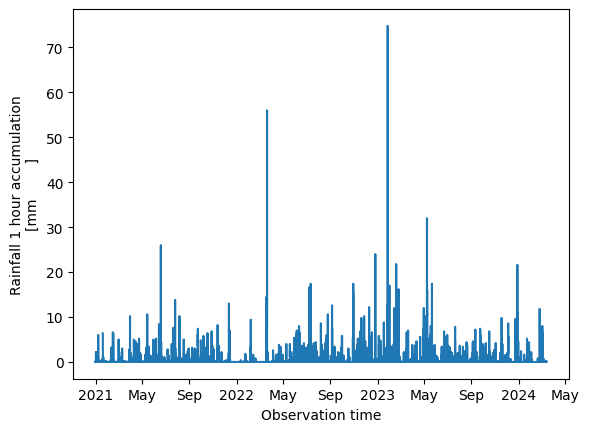

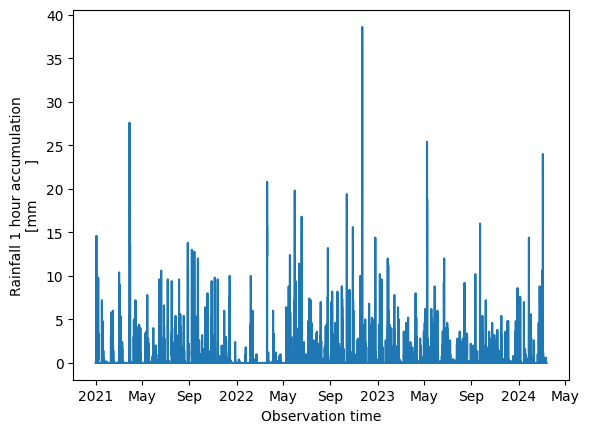

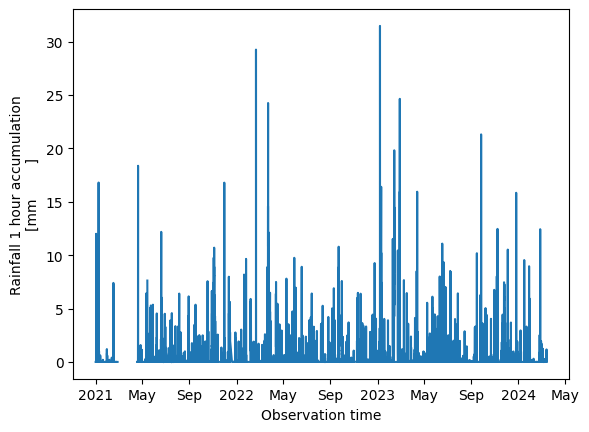

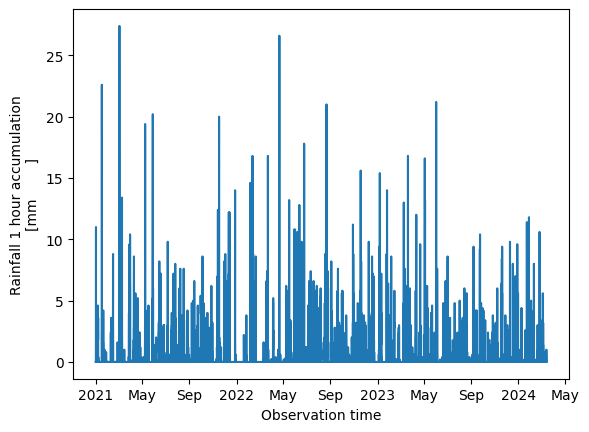

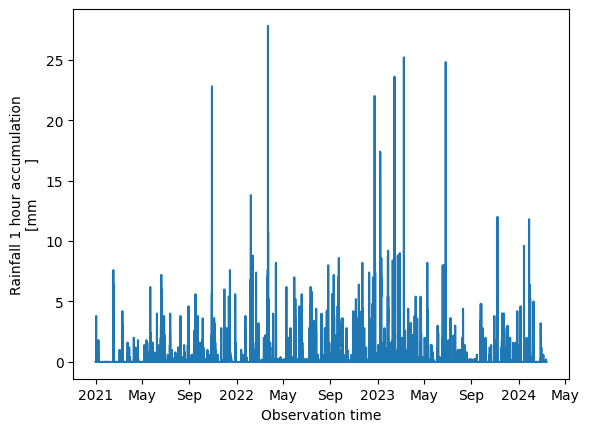

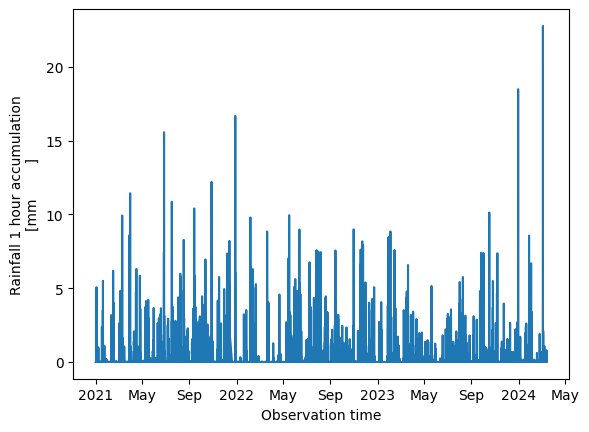

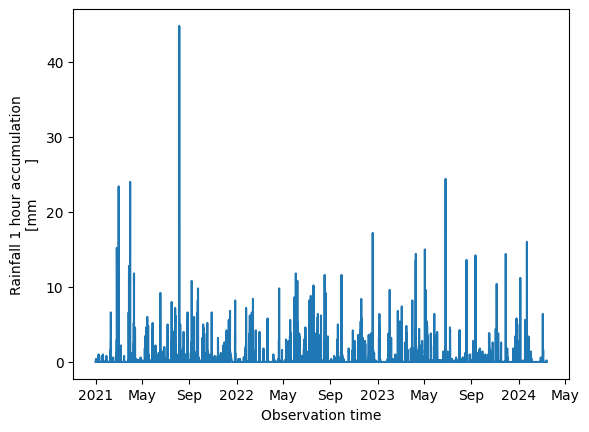

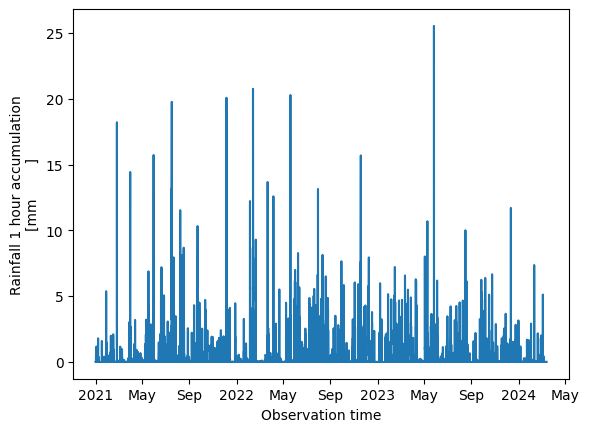

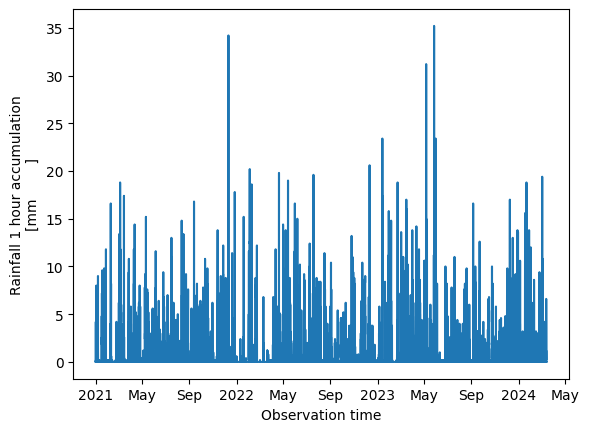

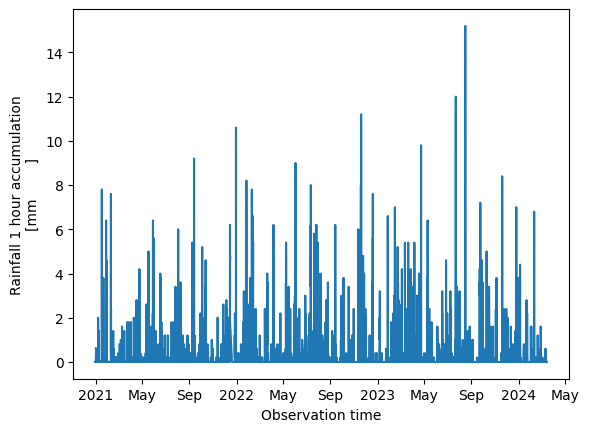

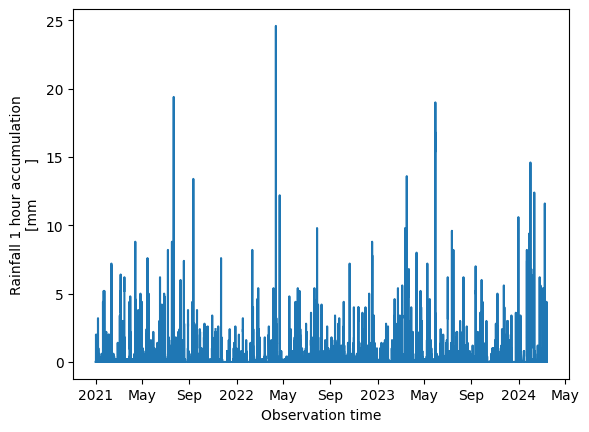

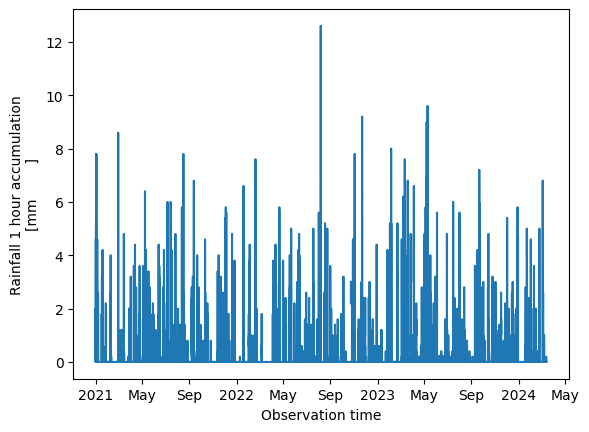

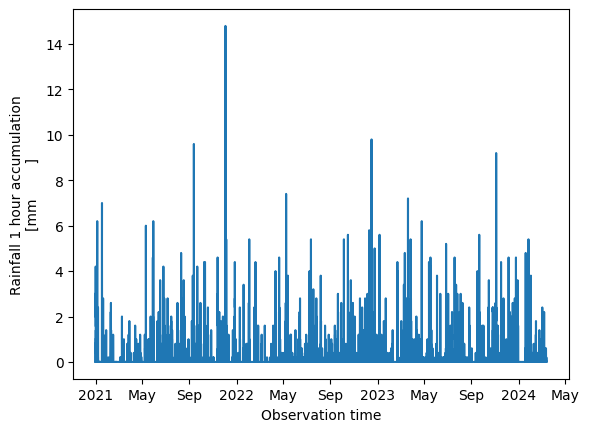

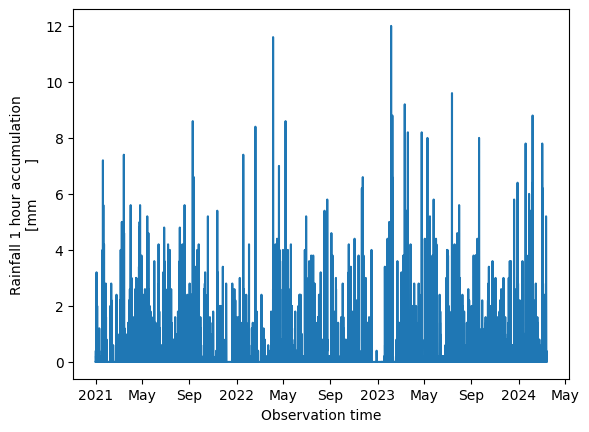

In [12]:
for station in station_obs:
    station['rrr01'].plot()
    plt.show()

# Dynamo DB

Lots of missing...

In [40]:
dt_start = datetime.datetime(2021, 7, 1)
dt_end = datetime.datetime(2023, 12, 31)

station_obs = []

for station in stations.keys():
    print(stations[station][0])

    obs_all = ddb.get_obs_all(f'{stations[station][0]}_nzaws', dt_start, dt_end, table_recent=True)

    obs_xr = xr.merge([ddb.extract_obs_data(obs_all, var, freq=None) for var in obs_all[0].keys()])

    station_obs.append(obs_xr)

NZKTA
NZWRA
NZAAA
NZHNA
NZGSA
NZNPA
NZNRA
NZOHA
NZNSA
NZWNA
NZHKA
NZCHA
NZCIA
NZQNA
NZDNA
NZNVA


In [48]:
for i, station in enumerate(stations.keys()):
    station_obs[i].to_netcdf(f'/home/benv/data/DeepSouth/obs_{stations[station][0]}.nc', engine='netcdf4')

# ICE

In [79]:
ice.get_obs_from_ice(stn_id='93482', tstart=datetime.datetime(2024, 3, 1), ice_fields='RRRR_1hr', )

{'name': '93482',
 'fullName': 'Wellington Aero Backup',
 'shortName': 'Wellington Aero Backup',
 'latitude': -41.331199645996094,
 'longitude': 174.80567932128906,
 'elevationInMeters': 13.0,
 'fields': []}